In [1]:
import time
import os
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import scipy
import pdb
import sys

/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nv/virtpy3tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: Futu

In [2]:
def imread(path, is_grayscale=True):
  """
  Read image using its path.
  Default value is gray-scale, and image is read by YCbCr format as the paper said.
  """
  if is_grayscale:
    return scipy.misc.imread(path, flatten=True, mode='YCbCr').astype(np.float)
  else:
    return scipy.misc.imread(path)#, mode='YCbCr')#.astype(np.float)


In [3]:
img = imread("CW1_Handout_Template_code/tf-SRCNN/image/butterfly_GT.bmp",is_grayscale=False)

/home/nv/virtpy3tf/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


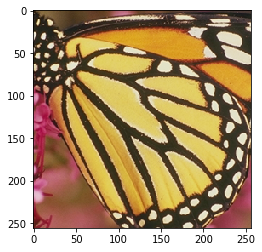

In [4]:
plt.imshow(img)
plt.show()

In [5]:
img.shape, img.dtype

((256, 256, 3), dtype('uint8'))

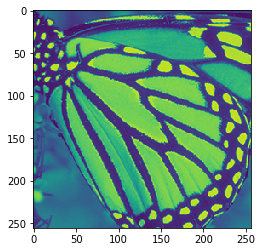

In [6]:
# Convert the image
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

# Show the image
plt.imshow(img_gray)
plt.show()

<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'numpy.ndarray'>


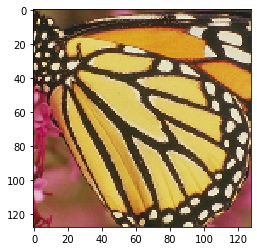

In [17]:
# To shrink the current image by 3 times with bicubic interpolation algorithm
img = tf.image.convert_image_dtype(img, tf.float32)
print(type(img))
# img_resize = tf.image.resize(img,[128,128], method=ResizeMethod.BICUBIC)
img_4d = tf.expand_dims(img,axis=0)
img_resize = tf.image.resize_bicubic(img_4d,[128,128])
print(type(img_resize))
tf.InteractiveSession() 
a_np=img_resize.eval()
print(type(a_np))
a_np = np.squeeze(a_np, axis=0)
plt.imshow(a_np)
plt.show()
# plt.imshow(np.real(img_resize))
# plt.show()

# with tf.Session() as sess:
#     sess.run(tf.global_variables_initializer())
#     while True:
#         try:
#             image_to_plot = sess.run(img_resize)
# #             plt.figure(figsize=(8,8))
# #             plt.subplot(2,2,n+1)
#             plt.imshow(image_to_plot)
#             plt.grid(False)
#             plt.xticks([])
#             plt.yticks([])

#         except tf.errors.OutOfRangeError:
#             break 